## <font color = "White"> ***Genetic Algorithm*** </font>

<font color = "White"> ***This genetic algorithm is designed to solve a randomly generated passcode, using concepts like selection, crossover, and mutation to improve the population of potential solutions across many generations.*** </font>

In [ ]:
# import the libraries we need
import random
import matplotlib.pyplot as plt

### <font color = "Red"> ***Fixed parameters***

###### ***main parameters we will use throughout the code for the genetic algorithm.***

#### <font color = "Red"> - </font> ***`LENGTH_PASS`: the length of the passcode in binary***
#### <font color = "Red"> - </font> ***`POPULATION`: Number of chromosomes in the population***
#### <font color = "Red"> - </font> ***`MUTATION_RATE`: the length of the passcode in binary***
#### <font color = "Red"> - </font> ***`Generations`: the length of the passcode in binary***


In [ ]:
LENGTH_PASS = 32
POPULATION = 100
MUTATION_RATE = 0.01
GENERATIONS = 1000

#### <font color= "red">-</font> ***`Generate 32-bit binary passcode`***


In [ ]:
def generate_passcode():
    return [random.randint(0, 1) for _ in range(LENGTH_PASS)]

#### <font color= "red">-</font> ***`Initialize the population`***
<font color = "black"> ***create the initial population of random chromosome***

In [ ]:
def initialize_population():
    return [[random.randint(0, 1) for _ in range(LENGTH_PASS)] for _ in range(POPULATION)]

#### <font color= "red">-</font> ***`Fitness Evaluation`***
<font color = "black">***Compute the fitness of a chromosome***

In [ ]:
def calculate_fitness(chromosome, passcode):
    return sum(1 for gene, target in zip(chromosome, passcode) if gene == target)

#### <font color= "red">-</font> ***`Selection`***
<font color = "black">***select the parents using a roulette wheel***

In [ ]:
def select_parents(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    selection_probs = [score / total_fitness for score in fitness_scores]
    return random.choices(population, weights=selection_probs, k=2)

#### <font color= "red">-</font> ***`Cross-Over`***
<font color = "black">***Combine genetic material from two parents***

In [ ]:
def crossover(parent1, parent2):
    point = random.randint(1, LENGTH_PASS - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

#### <font color= "red">-</font> ***`Mutation`***
<font color = "black">***flips bits in a chromosome randomly***

In [ ]:
def mutate(chromosome):
    return [gene if random.random() > MUTATION_RATE else 1 - gene for gene in chromosome]

#### <font color= "red">-</font> ***`Genetic algorithm function`***
<font color = "black">***this part of the code collects all the previous defined functions in order, to see how the code generates a passcode and tries to crack it***

Generated Passcode: 01010110111100101110100010111100
Passcode cracked in generation 90
Best Chromosome: 01010110111100101110100010111100


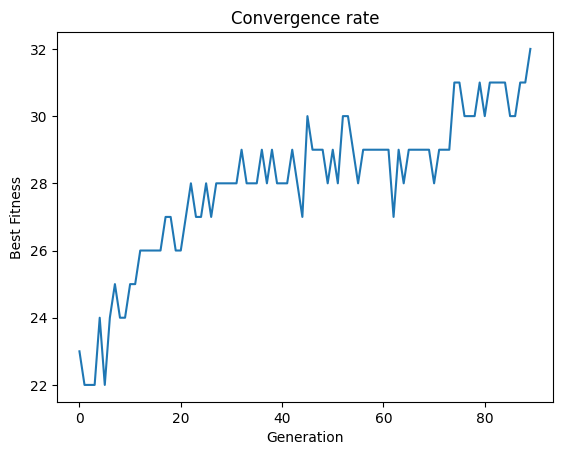

In [ ]:
def genetic_algorithm():

    # call the Generate target passcode method
    passcode = generate_passcode()
    print("Generated Passcode:", ''.join(map(str, passcode)))

    # call the Initialize population method
    population = initialize_population()
    fitness_history = []

    for generation in range(GENERATIONS):
        # Calculate fitness for each chromosome by calling the fitness function
        fitness_scores = [calculate_fitness(chrom, passcode) for chrom in population]
        fitness_history.append(max(fitness_scores))

        # Check if the passcode was found
        if max(fitness_scores) == LENGTH_PASS:
            print(f"Passcode cracked in generation {generation + 1}")
            print("Best Chromosome:", ''.join(map(str, population[fitness_scores.index(max(fitness_scores))])))
            break

        # Create new population
        new_population = []
        for _ in range(POPULATION // 2):
            parent1, parent2 = select_parents(population, fitness_scores)
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([mutate(child1), mutate(child2)])

        population = new_population

    # if the passcode was not found print that the operation failed
    else:
        print("Failed to crack passcode within the maximum generations.")


  # Plot fitness over generations
    plt.plot(range(len(fitness_history)), fitness_history)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Convergence rate')
    plt.show()

# Run the Genetic Algorithm
genetic_algorithm()